## Machine Learning Overview

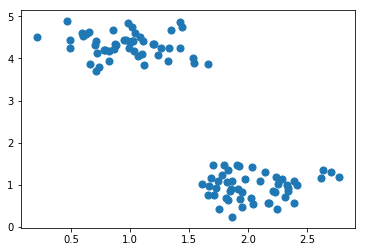

In [18]:
# Sklearn has convenient modules to create sample data.
# make_blobs will help us to create a sample data set suitable for clustering
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=100, centers=2, cluster_std=0.30, random_state=0)

# Let's visualize what we have first
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.scatter(X[:, 0], X[:, 1], s=50)

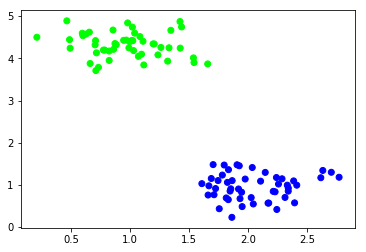

In [19]:
# We will import KMeans model from clustering model family of Sklearn
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=2)
k_means.fit(X)
predictions = k_means.predict(X)

# Let's plot the predictions
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='brg')

In [20]:
k_means.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'n_jobs': 1,
 'precompute_distances': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

## Featuretools

In [21]:
import pandas as pd

# First dataset contains the basic information for databases.
databases_df = pd.DataFrame({"database_id": [2234, 1765, 8796, 2237, 3398],
"creation_date": ["2018-02-01", "2017-03-02", "2017-05-03", "2013-05-12", "2012-05-09"]})

databases_df.head()

,database_id,creation_date
0,2234,2018-02-01
1,1765,2017-03-02
2,8796,2017-05-03
3,2237,2013-05-12
4,3398,2012-05-09


In [22]:
# Second dataset contains the information of transaction for each database id
db_transactions_df = pd.DataFrame({"transaction_id": [26482746, 19384752, 48571125, 78546789, 19998765, 26482646, 12484752, 42471125, 75346789, 16498765, 65487547, 23453847, 56756771, 45645667, 23423498, 12335268, 76435357, 34534711, 45656746, 12312987],
                "database_id": [2234, 1765, 2234, 2237, 1765, 8796, 2237, 8796, 3398, 2237, 3398, 2237, 2234, 8796, 1765, 2234, 2237, 1765, 8796, 2237],
                "transaction_size": [10, 20, 30, 50, 100, 40, 60, 60, 10, 20, 60, 50, 40, 40, 30, 90, 130, 40, 50, 30],
                "transaction_date": ["2018-02-02", "2018-03-02", "2018-03-02", "2018-04-02", "2018-04-02", "2018-05-02", "2018-06-02", "2018-06-02", "2018-07-02", "2018-07-02", "2018-01-03", "2018-02-03", "2018-03-03", "2018-04-03", "2018-04-03", "2018-07-03", "2018-07-03", "2018-07-03", "2018-08-03", "2018-08-03"]})

db_transactions_df.head()

,transaction_id,database_id,transaction_size,transaction_date
0,26482746,2234,10,2018-02-02
1,19384752,1765,20,2018-03-02
2,48571125,2234,30,2018-03-02
3,78546789,2237,50,2018-04-02
4,19998765,1765,100,2018-04-02


In [23]:
# Entities for each of datasets should be defined
entities = {
"databases" : (databases_df, "database_id"),
"transactions" : (db_transactions_df, "transaction_id")
}

# Relationships between tables should also be defined as below
relationships = [("databases", "database_id", "transactions", "database_id")]

print(entities)

{'databases': (   database_id creation_date
0         2234    2018-02-01
1         1765    2017-03-02
2         8796    2017-05-03
3         2237    2013-05-12
4         3398    2012-05-09, 'database_id'), 'transactions': (    transaction_id  database_id  transaction_size transaction_date
0         26482746         2234                10       2018-02-02
1         19384752         1765                20       2018-03-02
2         48571125         2234                30       2018-03-02
3         78546789         2237                50       2018-04-02
4         19998765         1765               100       2018-04-02
5         26482646         8796                40       2018-05-02
6         12484752         2237                60       2018-06-02
7         42471125         8796                60       2018-06-02
8         75346789         3398                10       2018-07-02
9         16498765         2237                20       2018-07-02
10        65487547         3398         

In [24]:
# There are 2 entities called ‘databases’ and ‘transactions’
# All the pieces that are necessary to engineer features are in place, you can create your feature matrix as below

import featuretools as ft

feature_matrix_db_transactions, feature_defs = ft.dfs(entities=entities, relationships=relationships, target_entity="databases")

feature_defs

ModuleNotFoundError: No module named 'featuretools'

## Auto-sklearn

In [25]:
# Necessary imports
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split

# Digits dataset is one of the most popular datasets in machine learning community.
# Every example in this datasets represents a 8x8 image of a digit.
X, y = sklearn.datasets.load_digits(return_X_y=True)

# Let's see the first image. Image is reshaped to 8x8, otherwise it's a vector of size 64.
X[0].reshape(8,8)

# Let's also plot couple of them
import matplotlib.pyplot as plt
%matplotlib inline

number_of_images = 10
images_and_labels = list(zip(X, y))

for i, (image, label) in enumerate(images_and_labels[:number_of_images]):
    plt.subplot(2, number_of_images, i + 1)
    plt.axis('off')
    plt.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

plt.show()

ModuleNotFoundError: No module named 'autosklearn'

In [26]:
# We split our dataset to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Similarly to creating an estimator in Scikit-learn, we create AutoSklearnClassifier
automl = autosklearn.classification.AutoSklearnClassifier()

# All you need to do is to invoke fit method to start experiment with different feature engineering methods and machine learning models
automl.fit(X_train, y_train)

# Generating predictions is same as Scikit-learn, you need to invoke predict method.
y_hat = automl.predict(X_test)

print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))
# Accuracy score 0.98

NameError: name 'autosklearn' is not defined

## MLBox

In [27]:
# Necessary Imports
from mlbox.preprocessing import *
from mlbox.optimisation import *
from mlbox.prediction import *
import wget

file_link = 'https://apsportal.ibm.com/exchange-api/v1/entries/8044492073eb964f46597b4be06ff5ea/data?accessKey=9561295fa407698694b1e254d0099600'
file_name = wget.download(file_link)

print(file_name)
# GoSales_Tx_NaiveBayes.csv

ModuleNotFoundError: No module named 'mlbox'

In [28]:
import pandas as pd
df = pd.read_csv('GoSales_Tx_NaiveBayes.csv')
df.head()

FileNotFoundError: File b'GoSales_Tx_NaiveBayes.csv' does not exist

In [29]:
test_df = df.drop(['PRODUCT_LINE'], axis = 1)

# First 300 records saved as test datased
test_df[:300].to_csv('test_data.csv')

paths = ["GoSales_Tx_NaiveBayes.csv", "test_data.csv"]
target_name = "PRODUCT_LINE"

rd = Reader(sep = ',')
df = rd.train_test_split(paths, target_name)

dft = Drift_thresholder()
df = dft.fit_transform(df)

opt = Optimiser(scoring = 'accuracy', n_folds = 3)
opt.evaluate(None, df)

space = {
        'ne__numerical_strategy':{"search":"choice", "space":[0]},
        'ce__strategy':{"search":"choice",
               "space":["label_encoding","random_projection", "entity_embedding"]},
        'fs__threshold':{"search":"uniform", "space":[0.01,0.3]},
        'est__max_depth':{"search":"choice", "space":[3,4,5,6,7]}
        }

best = opt.optimise(space, df,15)

predictor = Predictor()
predictor.fit_predict(best, df)

NameError: name 'df' is not defined

## TPOT

In [30]:
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Digits dataset that you have used in Auto-sklearn example
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    train_size=0.75, test_size=0.25)

# You will create your TPOT classifier with commonly used arguments
tpot = TPOTClassifier(generations=10, population_size=30, verbosity=2)

# When you invoke fit method, TPOT will create generations of populations, seeking best set of parameters. Arguments you have used to create TPOTClassifier such as generaions and population_size will affect the search space and resulting pipeline.
tpot.fit(X_train, y_train)

print(tpot.score(X_test, y_test))
# 0.9834

ModuleNotFoundError: No module named 'tpot'

In [31]:
tpot.export('my_pipeline.py')

NameError: name 'tpot' is not defined

In [32]:
!cat my_pipeline.py

cat: my_pipeline.py: No such file or directory


In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

exported_pipeline = make_pipeline(
    StackingEstimator(estimator=DecisionTreeClassifier(criterion="entropy", max_depth=6, min_samples_leaf=2, min_samples_split=2)),
    KNeighborsClassifier(n_neighbors=2, weights="distance")
)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)

NameError: name 'make_pipeline' is not defined